# Customer Personality Analysis — Python / Pandas

## Introduzione
Questo progetto analizza un dataset di clienti proveniente dal settore retail,
con informazioni demografiche, comportamentali e di spesa.  
L’obiettivo è comprendere quali segmenti di clientela contribuiscono di più
al fatturato e quali pattern emergono rispetto alle campagne marketing,
alle abitudini d’acquisto e alle categorie di prodotti.

Il progetto rappresenta un caso reale di **customer analytics**, molto comune
nel contesto aziendale (marketing, CRM, analisi vendite).  
L’analisi è interamente svolta con **Pandas**, seguendo un workflow da Data Analyst:

- ispezione e pulizia del dataset  
- creazione di nuove feature  
- aggregazioni e confronto tra gruppi  
- visualizzazioni descrittive  
- insight finali a supporto di decisioni di business  

---

## Obiettivi dell’analisi

### **1. Identificare quali clienti spendono di più**
- Analisi di età, reddito e spesa totale.  
- Costruzione della metrica **Total_Spent** per valutare il valore del cliente.

### **2. Valutare quali categorie di prodotto generano più acquisti**
- Analisi degli importi spesi in: vini, carne, frutta, pesce, dolci e oro.  
- Individuazione delle categorie dominanti.

### **3. Analizzare la spesa in base allo stato civile**
- Confronto tra Single, Married, Together, Divorced, ecc.  
- Verifica di differenze significative nei comportamenti d’acquisto.

### **4. Misurare l’efficacia delle campagne marketing**
- Tassi di risposta alle diverse campagne.  
- Relazione tra reddito/spesa e accettazione delle campagne.

### **5. Confrontare i canali d’acquisto**
- Numero di acquisti web, negozio, catalogo.  
- Identificazione di eventuali pattern generazionali o comportamentali.

---

## Output attesi
L’analisi produrrà:

- nuove colonne derivate (es. età, spesa totale)  
- tabelle aggregate per segmento  
- visualizzazioni professionali  
- insight sui clienti con maggior valore  
- suggerimenti strategici per marketing e vendite  

---

## Struttura del notebook
1. Caricamento e ispezione dataset  
2. Data cleaning  
3. Feature engineering  
4. Analisi esplorativa (EDA)  
5. Analisi per segmenti di clientela  
6. Analisi campagne marketing  
7. Analisi comportamenti d’acquisto  
8. Insight finali  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/customer_personalitymarket.csv", sep="\t",encoding ="latin1")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


---

- ## Pulizia Dati


In [2]:
print(df.shape)
df.info()


(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

In [3]:
#Pulisco le colonne per una migliore leggibilità
df.columns = (df.columns
              .str.strip()  # Rimuove spazi bianchi iniziali e finali
              .str.lower()  # Converte in minuscolo
              .str.replace(' ','_')  # Sostituisce spazi con underscore
              .str.replace('-','_'))  # Sostituisce trattini con underscore

In [4]:
#sistemo i nomi di certe colonne per maggiore leggibilità
df = df.rename(columns={
    "mntwines": "mnt_wines",
    "mntfruits": "mnt_fruits",
    "mntmeatproducts": "mnt_meat_products",
    "mntfishproducts": "mnt_fish_products",
    "mntsweetproducts": "mnt_sweet_products",
    "mntgoldprods": "mnt_gold_products",
    "numwebpurchases": "num_web_purchases",
    "numcatalogpurchases": "num_catalog_purchases",
    "numstorepurchases": "num_store_purchases",
    "numwebvisitsmonth": "num_web_visits_month"
})

#controllo le nuove colonne
df.columns.tolist()

['id',
 'year_birth',
 'education',
 'marital_status',
 'income',
 'kidhome',
 'teenhome',
 'dt_customer',
 'recency',
 'mnt_wines',
 'mnt_fruits',
 'mnt_meat_products',
 'mnt_fish_products',
 'mnt_sweet_products',
 'mnt_gold_products',
 'numdealspurchases',
 'num_web_purchases',
 'num_catalog_purchases',
 'num_store_purchases',
 'num_web_visits_month',
 'acceptedcmp3',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'acceptedcmp2',
 'complain',
 'z_costcontact',
 'z_revenue',
 'response']

In [5]:
#Controllo il numero di valori nulli per ogni colonna
df.isna().sum().sort_values(ascending=False)
#ci sono valori nulli solo nella colonna "Income", ma sono pochi, quindi li elimino
df = df[~df["income"].isna()].copy()
df.shape

(2216, 29)

In [6]:
#Creo la colonna Age per semplificare il lavoro
df["age"] = 2025 - df["year_birth"]

#controllo se ci sono eta' irrealistiche
df["age"].describe()
df["age"].sort_values().head(10)
df["age"].sort_values(ascending=False).head(10)

#mantengo solo le età realistiche
df = df[(df["age"] >= 18) & (df["age"] <= 100)].copy()
df.shape

(2213, 30)

In [7]:
#controllo le nuove colonne
df[["age", "income"]].describe()


,age,income
count,2213.000000,2213.000000
mean,56.082693,52236.581563
std,11.700216,25178.603047
min,29.000000,1730.000000
25%,48.000000,35246.000000
50%,55.000000,51373.000000
75%,66.000000,68487.000000
max,85.000000,666666.000000


In [8]:
#controllo i valori unici presenti in marital status
df["marital_status"].value_counts()

marital_status
Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [9]:
#correggo i valori anomali in marital status
df["marital_status"] = df["marital_status"].replace({
    "Alone" : "Single",
    "Absurd": "Single",
    "YOLO" : "Single",
    "Together" : "Married"
}).str.capitalize()
#controllo i valori unici presenti in marital status
df["marital_status"].value_counts()

marital_status
Married     1429
Single       477
Divorced     231
Widow         76
Name: count, dtype: int64

In [10]:
#Creo la colonna total_spent per avere un totale della spesa di ogni cliente
spend_cols = [ "mnt_wines","mnt_fruits","mnt_meat_products","mnt_fish_products",
               "mnt_sweet_products","mnt_gold_products" ]
df["total_spent"] = df[spend_cols].sum(axis=1)
df.total_spent.describe()

count    2213.000000
mean      607.021690
std       602.488663
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: total_spent, dtype: float64

In [11]:
#Creo la colonna children per raggruppare figli e adolescenti
df["children"] = df["kidhome"] + df["teenhome"]
df["children"].value_counts(ascending=False)


children
1    1115
0     632
2     416
3      50
Name: count, dtype: int64

In [12]:
#Creo la colonna total_purchases per avere un totale degli acquisti di ogni cliente
purchase_cols = [ "num_web_purchases","num_catalog_purchases","num_store_purchases"]
df["total_purchases"] = df[purchase_cols].sum(axis=1)
df["total_purchases"].describe()

count    2213.000000
mean       12.564392
std         7.204770
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: total_purchases, dtype: float64

In [13]:
#Creo la colonna customer_tenure per calcolare l'anzianità del cliente
#cambio il formato della colonna dt_customer in datetime
df["df_customer"] = pd.to_datetime(df["dt_customer"],format="%d-%m-%Y")

#calcolo l'anzianità in anni
df["customer_tenure"] = (pd.Timestamp("2025-01-01") - df["df_customer"]).dt.days
#converto in anni
df["customer_tenure_years"] = (df["customer_tenure"] / 365).astype(int).round(1)

In [14]:
#Sommo le campagne accettate
campaign_cols = [ "acceptedcmp1","acceptedcmp2","acceptedcmp3",
                  "acceptedcmp4","acceptedcmp5" ]
df["campaigns_accepted"] = df[campaign_cols].sum(axis=1)


In [15]:
#verifico le nuove colonne
df[["total_spent","children","total_purchases",
    "customer_tenure_years","campaigns_accepted"]].head()

,total_spent,children,total_purchases,customer_tenure_years,campaigns_accepted
0,1617,0,22,12,0
1,27,2,4,10,0
2,776,0,20,11,0
3,53,1,6,10,0
4,422,1,14,10,0


---

- ## Analisi Descrittiva:
### **1. Identificare quali clienti spendono di più**
- Analisi di età, reddito e spesa totale.  

In [16]:
#Controllo al distribuzione delle spese totali
df["total_spent"].describe()

count    2213.000000
mean      607.021690
std       602.488663
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: total_spent, dtype: float64

In [18]:
#Calcolo la correlazione
df[["income" , "total_spent"]].corr()
#abbiamo una forte correlazione, come si poteva già notare dal grafico sopra

,income,total_spent
income,1.000000,0.667516
total_spent,0.667516,1.000000


In [19]:
#Creo delle fasce di reddito
df["income_range"] = pd.qcut(df["income"], q=4, labels=["Low", "Medium", "High", "Very High"])
#Calcolo la spesa media
df.groupby("income_range",observed=False)["total_spent"].mean()

income_range
Low            81.592058
Medium        231.616637
High          759.072333
Very High    1356.755877
Name: total_spent, dtype: float64

In [20]:
#Controllo la correlazione fra età e spesa
#creo delle fasce d'età
df["age_group"] = pd.cut(df["age"],bins=[18,30,45,60,90], labels=["18-30", "31-45","46-60","60+"])
#controllo la spesa media per età
df.groupby("age_group",observed=False)["total_spent"].mean()


age_group
18-30    563.428571
31-45    573.660194
46-60    539.277886
60+      714.902850
Name: total_spent, dtype: float64

In [21]:
#Trovo i TOP Spenders
df_top = df.sort_values(by="total_spent",ascending=False).head(20)
df_top[["income","age","total_spent","income_range","age_group"]]
#Come previsto, i top spenders sono persone con reddito alto e di mezza età

,income,age,total_spent,income_range,age_group
1179,90638.0,34,2525,Very High,31-45
1572,90638.0,34,2525,Very High,31-45
1492,87679.0,37,2524,Very High,31-45
987,75759.0,56,2486,Very High,46-60
1052,69098.0,76,2440,Very High,60+
1601,90226.0,69,2352,Very High,60+
1458,93790.0,55,2349,Very High,46-60
1288,83151.0,53,2346,Very High,46-60
943,94384.0,72,2302,Very High,60+
1301,94384.0,72,2302,Very High,60+


### Insight:

- I clienti con reddito maggiore spendono relativamente di più.
- I clienti più profittevoli sono quelli nel range di età **35-60**

---

### **2. Valutare quali categorie di prodotto generano più acquisti**
- Analisi degli importi spesi in: vini, carne, frutta, pesce, dolci e oro.  
- Individuazione delle categorie dominanti.

In [22]:
#Seleziono le colonne di spesa per categoria
category_cols = ["mnt_wines","mnt_fruits","mnt_meat_products","mnt_fish_products","mnt_sweet_products","mnt_gold_products"]
df[category_cols].sum().sort_values(ascending=False)

mnt_wines             675305
mnt_meat_products     369488
mnt_gold_products      97176
mnt_fish_products      83287
mnt_sweet_products     59828
mnt_fruits             58255
dtype: int64

In [23]:
#Calcolo la spesa media per categoria
df[category_cols].mean().sort_values(ascending=False)

mnt_wines             305.153638
mnt_meat_products     166.962494
mnt_gold_products      43.911432
mnt_fish_products      37.635337
mnt_sweet_products     27.034794
mnt_fruits             26.323995
dtype: float64

In [24]:
#Creo una tabella con vendite totali per categorie
category_totals = df[category_cols].sum().sort_values(ascending=False)
category_totals

mnt_wines             675305
mnt_meat_products     369488
mnt_gold_products      97176
mnt_fish_products      83287
mnt_sweet_products     59828
mnt_fruits             58255
dtype: int64

In [25]:
#Transformo category_totals in un dataframe
category_totals = category_totals.reset_index()
category_totals.columns = ["category","total_revenue"]
category_totals

,category,total_revenue
0,mnt_wines,675305
1,mnt_meat_products,369488
2,mnt_gold_products,97176
3,mnt_fish_products,83287
4,mnt_sweet_products,59828
5,mnt_fruits,58255


### Insights:
- Il vino rappresenta oltre il 40-50% della spesa totale
- La carne è la seconda categoria più importante, con un contributo alla spesa media per cliente
- Pesce,dolci e oro sono categorie minori, ma utili per segmentazione
- La frutta è la categoria più debole, con basse vendite sia totali che medie.


---

### **3. Analizzare la spesa in base allo stato civile**
- Confronto tra Single, Married, Together, Divorced, ecc.  
- Verifica di differenze significative nei comportamenti d’acquisto.

In [26]:
#Spesa media per gruppo matrimoniale
df.groupby("marital_status")["total_spent"].mean().sort_values(ascending=False)

marital_status
Widow       727.960526
Single      613.232704
Divorced    612.991342
Married     597.551435
Name: total_spent, dtype: float64

In [27]:
#Valuto il numero di clienti per gruppo
df["marital_status"].value_counts(normalize=True)*100

marital_status
Married     64.572978
Single      21.554451
Divorced    10.438319
Widow        3.434252
Name: proportion, dtype: float64

### Insights:

- Le **Widow** rappresentano un segmento molto piccolo **(3.4%)**, ma ad alto valore medio **(728 Eur)**.
- I clienti **Married** sono la base più grande **(64.5%)** e generano la quota maggiore di ricavi totali, nonostante una spesa media più bassa **(599 Eur)**


---

### **4. Misurare l’efficacia delle campagne marketing**
- Tassi di risposta alle diverse campagne.  
- Relazione tra reddito/spesa e accettazione delle campagne.

In [28]:
#Controllo quante persone hanno accettato ogni campagna
campaign_cols = [col for col in df.columns if "acceptedcmp" in col] + ["response"]
df[campaign_cols].sum().sort_values(ascending=False)


response        333
acceptedcmp4    164
acceptedcmp3    163
acceptedcmp5    161
acceptedcmp1    142
acceptedcmp2     30
dtype: int64

In [29]:
#Creo il totale della risposta alle campagne per ogni cliente
df["campaign_response_total"] = df[campaign_cols].sum(axis=1)

In [30]:
#Rapporto percentuale di risposta
(df[campaign_cols].sum()/len(df)*100).round(2)

acceptedcmp3     7.37
acceptedcmp4     7.41
acceptedcmp5     7.28
acceptedcmp1     6.42
acceptedcmp2     1.36
response        15.05
dtype: float64

In [31]:
#Spendono di più quelli che rispondono?
df.groupby("campaign_response_total")["total_spent"].mean()


campaign_response_total
0     460.712244
1     825.010870
2    1059.201439
3    1486.921569
4    1673.527778
5    1514.000000
Name: total_spent, dtype: float64

In [32]:
#Reddito per gruppo
df.groupby("campaign_response_total")["income"].mean()

campaign_response_total
0    48677.174643
1    56750.796196
2    61659.035971
3    78462.352941
4    82143.277778
5    86434.400000
Name: income, dtype: float64

### Insights:

- Le campagne registrano una risposta complessivamente bassa **(5-7%)**, ma la campagna finale ha una
performance nettamente superiore **(15%)**, suggerendo miglioramenti nel targeting dei contenuti dell'offerta.
- Esiste una crescita marcata della spesa all'aumentare delle risposte alle campagne.
- I clienti che accettano 3-4 offerte spendono fino a **3.6x** rispetto a chi non risponde.
- I clienti con maggiore reddito rispondono più frequentemente alle campagne, e sono anche quelli che spendono di più, il marketing ha impatto sulla fascia di reddito medio-alta.


---

### **5. Confrontare i canali d’acquisto**
- Numero di acquisti web, negozio, catalogo.  
- Identificazione di eventuali pattern generazionali o comportamentali.

In [33]:
#Calcolo il totale degli acquisti per canale
purchase_cols = ["num_web_purchases","num_store_purchases", "num_catalog_purchases"]

df[purchase_cols].sum().sort_values(ascending=False)


num_store_purchases      12847
num_web_purchases         9046
num_catalog_purchases     5912
dtype: int64

In [34]:
#Calcolo la media di acquisti per cliente
df[purchase_cols].mean().sort_values(ascending=False)

num_store_purchases      5.805242
num_web_purchases        4.087664
num_catalog_purchases    2.671487
dtype: float64

In [35]:
#Controllo chi spende di più nei diversi canali
channel_spent= {
    "web" : df.groupby("num_web_purchases")["total_spent"].mean().mean(),
    "store" : df.groupby("num_store_purchases")["total_spent"].mean().mean(),
    "catalog" : df.groupby("num_catalog_purchases")["total_spent"].mean().mean()
}

channel_spent

{'web': np.float64(671.183385611505),
 'store': np.float64(769.6507513521932),
 'catalog': np.float64(1125.0632019771372)}

In [36]:
#Relazione tra canali e numero totale di acquisti
df[["num_web_purchases","num_store_purchases","num_catalog_purchases","total_purchases"]].corr()

,num_web_purchases,num_store_purchases,num_catalog_purchases,total_purchases
num_web_purchases,1.000000,0.515805,0.386599,0.770327
num_store_purchases,0.515805,1.000000,0.517984,0.857919
num_catalog_purchases,0.386599,0.517984,1.000000,0.787098
total_purchases,0.770327,0.857919,0.787098,1.000000


### Insights:
- Il canale fisico è nettamente il più utilizzato.
- La maggior parte dei clienti compra principalmente in negozio.
- I clienti store sono i più redditizi.
- Il numero di acquisti in store ha il legame più forte con il consumo totale.
- Il catalogo, pur essendo poco utilizzato, è comunque collegato al volume d'acquisto.


---

- ## Visualizzazione

In [50]:
from matplotlib.ticker import FuncFormatter

PALETTE = ["#1f77b4"]
plt.rcParams["figure.figsize"] = (9,5)

def euro(x,pos):
        return f"€{x:,.0f}".replace(",",".")

### GRAFICO 1 - INCOME VS TOTAL SPENT

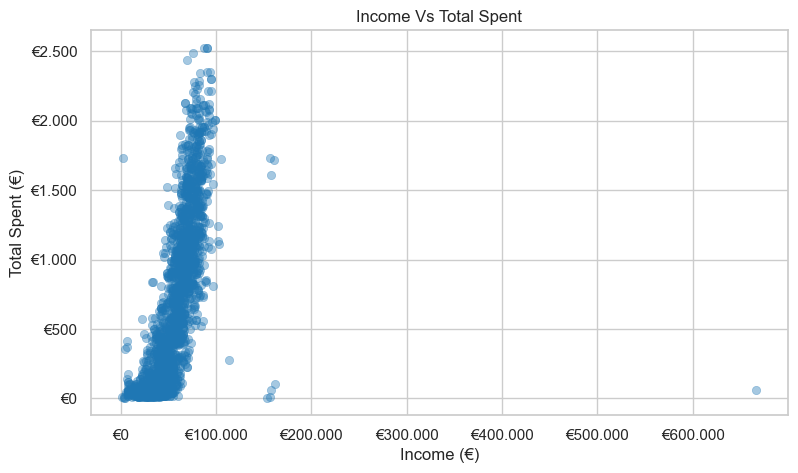

In [57]:
#Cerco di capire se chi spende di più e' correlato a chi guadagna di più
plt.figure()
sns.scatterplot(
            data = df,
            x = "income",
            y = "total_spent",
            alpha = 0.4,
            color = PALETTE[0],
            edgecolor = None
)

plt.title("Income Vs Total Spent")
plt.xlabel("Income (€)")
plt.ylabel("Total Spent (€)")
plt.gca().xaxis.set_major_formatter(FuncFormatter(euro))
plt.gca().yaxis.set_major_formatter(FuncFormatter(euro))
plt.show()

---

### GRAFICO 2 - SPESA MEDIA PER FASCIA DI REDDITO

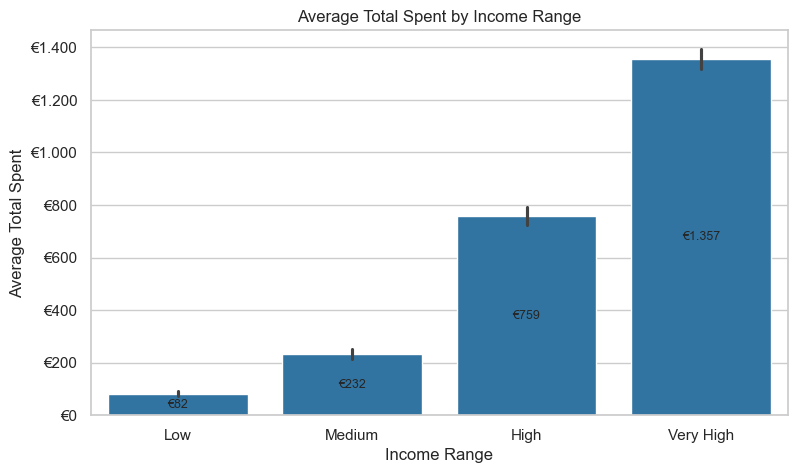

In [69]:
ax = sns.barplot(
        data = df,
        x = "income_range",
        y = "total_spent",
        estimator = "mean",
        order = ["Low", "Medium", "High", "Very High"],
        color=PALETTE[0]
)

plt.title("Average Total Spent by Income Range")
plt.xlabel("Income Range")
plt.ylabel("Average Total Spent")
plt.gca().yaxis.set_major_formatter(FuncFormatter(euro))

for p in ax.patches:
    ax.annotate(
        euro(p.get_height(), None),
        (p.get_x() + p.get_width() / 2, p.get_height()/2),
        ha='center',
        va='center',
        fontsize = 9
    )

plt.show()

---
### GRAFICO 3 - CATEGORIE DI PRODOTTO

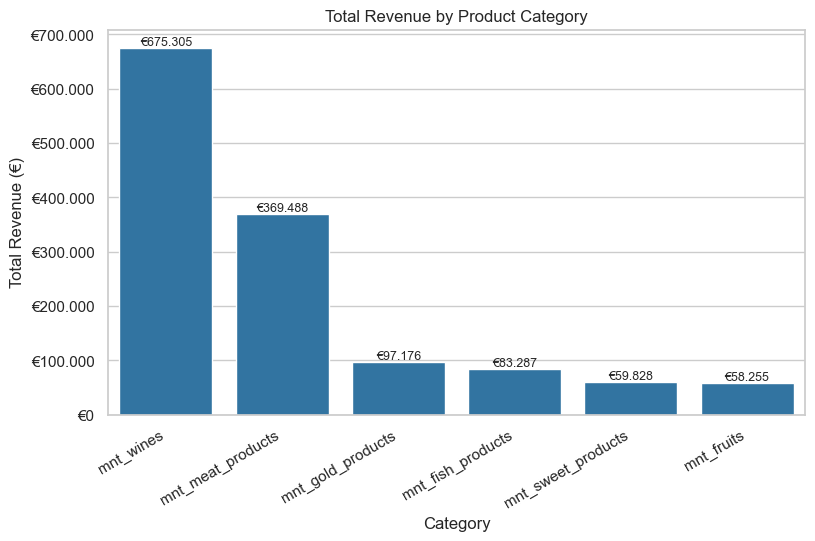

In [75]:
category_totals = df[[
    "mnt_wines", "mnt_meat_products",
    "mnt_fish_products","mnt_sweet_products",
    "mnt_gold_products","mnt_fruits"
]].sum().sort_values(ascending=False)

ax = sns.barplot(
        x=category_totals.index,
        y=category_totals.values,
        color = PALETTE[0]
)

plt.title("Total Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (€)")
plt.xticks(rotation=30, ha = "right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(euro))

for i, v in enumerate(category_totals.values): 
        ax.text(i,v,euro(v,None),
    ha = "center", va = "bottom", fontsize = 9)

plt.show()

---
### GRAFICO 4 - SPESA MEDIA PER STATO CIVILE


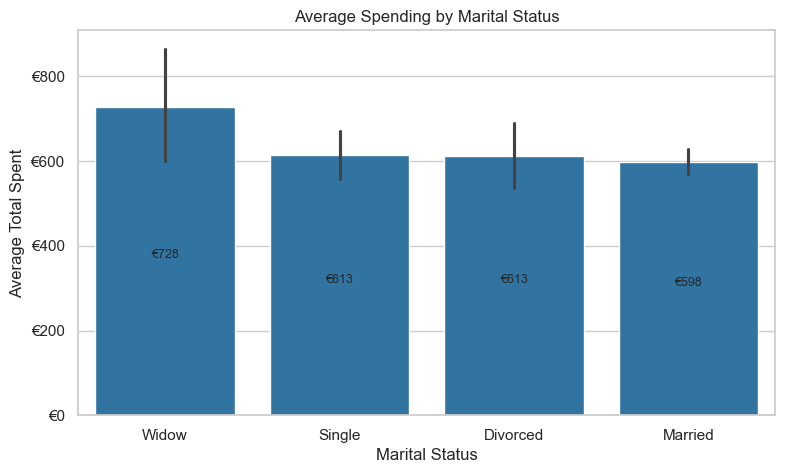

In [82]:
ax = sns.barplot(
    data = df,
    x="marital_status",
    y="total_spent",
    estimator= "mean",
    order= df.groupby("marital_status")["total_spent"]
                    .mean()
                    .sort_values(ascending=False).index,
    color = PALETTE[0]
)
plt.title("Average Spending by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Total Spent")
plt.gca().yaxis.set_major_formatter(FuncFormatter(euro))

for p in ax.patches:
        ax.annotate(
                euro(p.get_height(), None),
                (p.get_x() + p.get_width()/2, p.get_height()/2),
            ha="center", va="bottom",
        fontsize=9
        )

plt.show()

---
### GRAFICO 5 - MARKETING: RISPOSTE VS SPESA

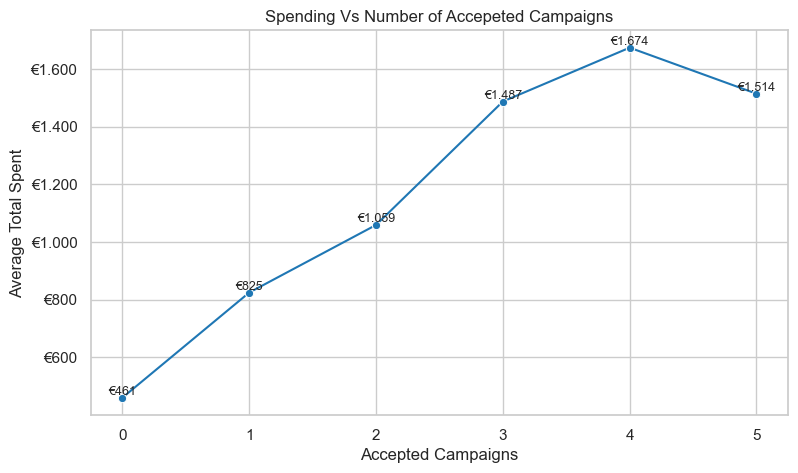

In [87]:
plot_df = (
        df.groupby("campaign_response_total")["total_spent"].mean().reset_index()
)

ax = sns.lineplot(
    data = df.groupby("campaign_response_total")["total_spent"]
                .mean()
                .reset_index(),
                x = "campaign_response_total",
                y = "total_spent",
                marker = "o",
                color = PALETTE[0]
)
plt.title("Spending Vs Number of Accepeted Campaigns")
plt.xlabel("Accepted Campaigns")
plt.ylabel("Average Total Spent")
plt.gca().yaxis.set_major_formatter(FuncFormatter(euro))

for _, r in plot_df.iterrows():

    ax.text(r["campaign_response_total"], r["total_spent"],
                euro(r["total_spent"],None),
                ha="center", va="bottom", fontsize= 9)
plt.show()

---
### GRAFICO 6 - CANALI DI ACQUISTO

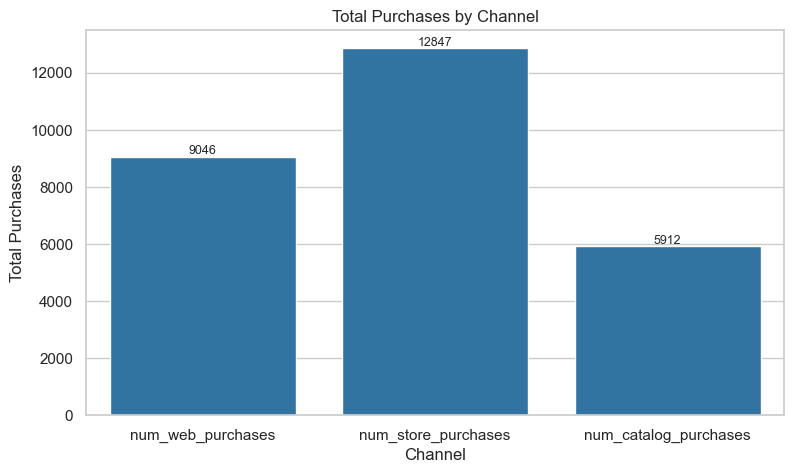

In [89]:
channel_totals = df[[
        "num_web_purchases",
        "num_store_purchases",
        "num_catalog_purchases"
]].sum()

ax = sns.barplot(
        x = channel_totals.index,
        y = channel_totals.values,
        color = PALETTE[0]
)
plt.title("Total Purchases by Channel")
plt.xlabel("Channel")
plt.ylabel("Total Purchases")

for i,v in enumerate(channel_totals.values):
        ax.text(i,v, f"{int(v)}",
        ha="center",va="bottom", fontsize=9)

plt.show()


---

## CONCLUSIONI FINALI

- La spesa dei clienti è fortemente sbilanciata: una minoranza di clienti genera una quota significativa del fatturato totale.

- Il reddito risulta essere predittore della spesa: i clienti con reddito elevati tendono a spendere significativamente di più.

- Le categorie di prodotto che contribuiscono maggiormente al fatturato sono il **vino** e i **prodotti a base di carne**, che rappresentano i principali driver di ricavo.

- I clienti **Married** generano il volume di vendite complessivo più alto, mentre i clienti **Widow**, pur rappresentando una percentuale ridotta del dataset, mostrano la spesa media più elevata.

- Le campagne di marketing presentano tassi di risposta complessivamente contenuti; tuttavia, i clienti che rispondono alle campagne
mostrano una spesa media e un reddito significativamente più alti.

- Il canale **Store** è il più rilevante sia in termini di volume di acquisti sia di valore generato, mentre il canale **Web** rappresenta un'opportunità di crescita futura attraverso strategie di marketing mirate.